# Example of using the Borehole3D class

## Imports

In [1]:
from striplog import Component, Decor, Legend, Lexicon, Striplog
from core.visual import Borehole3D, striplog_legend_to_omf_legend 
from utils.lexicon.lexicon_memoris import LEG_CONTAMINATION_LEV
from utils.config import DEFAULT_LITHO_LEXICON, DEFAULT_LITHO_LEGEND, DEFAULT_POL_LEXICON
from utils.io import dataframe_viewer
from utils.orm import boreholes_from_dataframe
from utils.visual import legend_from_attributes
from core.project import Project
from core.orm import BoreholeOrm, PositionOrm, Base 

import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from definitions import ROOT_DIR

## Reading of CSV files in a dir

In [2]:
save_dir = ROOT_DIR+'/CF_data/Donnees_fusionnees/final_data/'

In [3]:
df = pd.read_csv(save_dir+'Final_dataset.csv', sep=',')

In [4]:
dataframe_viewer(df, rows=5, un_val='ID')

Rows : 112, columns : 131, Unique values on col 'ID': 46


interactive(children=(IntSlider(value=5, description='rows', max=112, min=5, readout=False), IntSlider(value=1…

## Data Checking

In [5]:
df.rename({'Ech_base':'Base_intv', 'Ech_top':'Top_intv', 'Ep_litho':'Epais_intv', 'Description':'Lithology'}
          , axis='columns', inplace=True)

In [6]:
df['Epais_intv'] = df['Base_intv'] - df['Top_intv']

In [7]:
df['Diam_for'] = df['Diam_for']/1000
df.insert(list(df.columns).index('Long_for')+1, 'Diam_for', df.pop('Diam_for'))

In [8]:
dataframe_viewer(df, rows=3, un_val='ID_ech')

Rows : 112, columns : 132, Unique values on col 'ID_ech': 112


interactive(children=(IntSlider(value=3, description='rows', max=112, min=3, readout=False), IntSlider(value=1…

## Create Boreholes from dataframes

In [9]:
boreholes, components, link_intv_comp = boreholes_from_dataframe(df, verbose=False,
                                                attributes=['Lithology'], average_z=102,
                                                symbols={'lithology':{'lexicon':DEFAULT_LITHO_LEXICON}}, 
                                                diameter='Diam_for', thickness='Epais_intv')


Dataframe processing...

|__ID:'201'
Summary : dict_values([Striplog(2 Intervals, start=0.0, stop=0.8999999999999999)])

|__ID:'205'
Summary : dict_values([Striplog(4 Intervals, start=0.0, stop=1.5)])

|__ID:'208'
Summary : dict_values([Striplog(4 Intervals, start=0.0, stop=1.4999999999999996)])

|__ID:'207'
Summary : dict_values([Striplog(5 Intervals, start=0.0, stop=1.8000000000000007)])

|__ID:'212'
Summary : dict_values([Striplog(4 Intervals, start=0.0, stop=1.4999999999999991)])

|__ID:'214'
Summary : dict_values([Striplog(4 Intervals, start=0.0, stop=1.6999999999999997)])

|__ID:'217'
Summary : dict_values([Striplog(4 Intervals, start=0.0, stop=1.5000000000000004)])

|__ID:'221'
Error : No value matches with 'Vide ' in given lexicon
Summary : dict_values([Striplog(1 Intervals, start=0.0, stop=0.4)])

|__ID:'223'
Summary : dict_values([Striplog(2 Intervals, start=0.0, stop=0.8)])

|__ID:'?2'
Summary : dict_values([Striplog(1 Intervals, start=0.0, stop=0.3999999999999999)])

|__ID

/home/yanathan/Projects/GSDMA/utils/orm.py:121: SAWarning: relationship 'ComponentOrm.intervals' will copy column Components.id to column Linkintervalcomponent.comp_id, which conflicts with relationship(s): 'IntervalOrm.components' (copies Components.id to Linkintervalcomponent.comp_id). If this is not the intention, consider if these relationships should be linked with back_populates, or if viewonly=True should be applied to one or more if they are read-only. For the less common case that foreign key constraints are partially overlapping, the orm.foreign() annotation can be used to isolate the columns that should be written towards.   To silence this warning, add the parameter 'overlaps="components"' to the 'ComponentOrm.intervals' relationship.
  boreholes_orm.append(BoreholeOrm(id=bh_name, date=bh_date))
/home/yanathan/Projects/GSDMA/utils/orm.py:121: SAWarning: relationship 'ComponentOrm.intervals' will copy column Intervals.id to column Linkintervalcomponent.intv_id, which conflic

In [10]:
len(boreholes), len(components)

(46, 8)

In [11]:
for b in boreholes:
    for k, v in b.intervals.items():
        print({b.id:[v.interval_number, v.top.middle, v.base.middle, b.intervals_values[k]]})

{'201': [0, 101.926886, 101.426886, '{"lithology": "remblais"}']}
{'201': [1, 101.426886, 101.02688599999999, '{"lithology": "remblais"}']}
{'205': [0, 101.804167, 101.404167, '{"lithology": "boue"}']}
{'205': [1, 101.404167, 100.904167, '{"lithology": "boue"}']}
{'205': [2, 100.904167, 100.70416700000001, '{"lithology": "boue"}']}
{'205': [3, 100.70416700000001, 100.304167, '{"lithology": "boue"}']}
{'208': [0, 101.847697, 101.347697, '{"lithology": "remblais"}']}
{'208': [1, 101.347697, 101.047697, '{"lithology": "remblais"}']}
{'208': [2, 101.047697, 100.647697, '{"lithology": "remblais"}']}
{'208': [3, 100.647697, 100.347697, '{"lithology": "remblais"}']}
{'207': [0, 101.889132, 101.489132, '{"lithology": "remblais"}']}
{'207': [1, 101.489132, 101.089132, '{"lithology": "remblais"}']}
{'207': [2, 101.089132, 100.689132, '{"lithology": "remblais"}']}
{'207': [3, 100.689132, 100.489132, '{"lithology": "remblais"}']}
{'207': [4, 100.489132, 100.089132, '{"lithology": "remblais"}']}
{'

## Create a dictionary containing legends for each representation attribute

In [12]:
legend_dict = legend_from_attributes([('lithology', DEFAULT_LITHO_LEGEND)])

## Create a project and save data in a database

In [13]:
DB_name = 'tmp_files/real_orm_db.db'

if os.path.exists(DB_name):
    os.remove(DB_name)

engine = create_engine(f"sqlite:///{DB_name}", echo=True)

In [14]:
Base.metadata.create_all(engine)

2021-10-12 23:20:36,002 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-10-12 23:20:36,004 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Boreholes")
2021-10-12 23:20:36,005 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-10-12 23:20:36,006 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("Boreholes")
2021-10-12 23:20:36,007 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-10-12 23:20:36,008 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Samples")
2021-10-12 23:20:36,009 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-10-12 23:20:36,010 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("Samples")
2021-10-12 23:20:36,010 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-10-12 23:20:36,011 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Intervals")
2021-10-12 23:20:36,012 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-10-12 23:20:36,013 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("Intervals")
2021-10-12 23:20:36,014 INFO sqlalchemy.engine.Engine [raw

In [15]:
Session = sessionmaker(bind=engine)
session = Session()

#### Set project's legend dictionary

In [16]:
p = Project(session, legend_dict=legend_dict, lexicon=DEFAULT_LITHO_LEXICON)

2021-10-12 23:20:36,102 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-10-12 23:20:36,106 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".date AS "Boreholes_date", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-10-12 23:20:36,107 INFO sqlalchemy.engine.Engine [generated in 0.00088s] ()


#### Add components, boreholes into the project

In [17]:
p.add_components(components)

2021-10-12 23:20:36,113 INFO sqlalchemy.engine.Engine INSERT INTO "Components" (id, description) VALUES (?, ?)
2021-10-12 23:20:36,114 INFO sqlalchemy.engine.Engine [generated in 0.00122s] ((0, 'Remblais'), (1, 'Boue'), (2, '_'), (3, 'Schistes'), (4, 'Limon'), (5, 'Limons'), (6, 'Béton'), (7, 'Alluvions'))
2021-10-12 23:20:36,116 INFO sqlalchemy.engine.Engine COMMIT
Boreholes in the project :  0
2021-10-12 23:20:36,120 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-10-12 23:20:36,121 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".date AS "Boreholes_date", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-10-12 23:20:36,121 INFO sqlalchemy.engine.Engine [cached since 0.01561s ago] ()


In [18]:
for bh in boreholes:
    p.add_borehole(bh)

2021-10-12 23:20:36,128 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, date, length, diameter) VALUES (?, ?, ?, ?)
2021-10-12 23:20:36,129 INFO sqlalchemy.engine.Engine [generated in 0.00123s] ('201', None, 0.8999999999999999, 0.075)
2021-10-12 23:20:36,131 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-10-12 23:20:36,132 INFO sqlalchemy.engine.Engine [generated in 0.00101s] ((0, 101.926886, 101.926886, 101.926886, 152890.245758, 122596.47426), (1, 101.426886, 101.426886, 101.426886, 152890.245758, 122596.47426), (2, 101.426886, 101.426886, 101.426886, 152890.245758, 122596.47426), (3, 101.02688599999999, 101.02688599999999, 101.02688599999999, 152890.245758, 122596.47426))
2021-10-12 23:20:36,134 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id, data_id) VALUES (?, ?, ?, ?, ?, ?, ?)
2021-10-12 23:20:36,134 INFO sqlalchemy.engine.Engine [g

2021-10-12 23:20:36,202 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-10-12 23:20:36,202 INFO sqlalchemy.engine.Engine [cached since 0.04925s ago] (8,)
2021-10-12 23:20:36,204 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-10-12 23:20:36,205 INFO sqlalchemy.engine.Engine [cached since 0.0481s ago] (9,)
2021-10-12 23:20:36,207 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "P

2021-10-12 23:20:36,269 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-10-12 23:20:36,270 INFO sqlalchemy.engine.Engine [cached since 0.1388s ago] ((20, 101.889132, 101.889132, 101.889132, 152892.92499700002, 122592.662277), (21, 101.489132, 101.489132, 101.489132, 152892.92499700002, 122592.662277), (22, 101.489132, 101.489132, 101.489132, 152892.92499700002, 122592.662277), (23, 101.089132, 101.089132, 101.089132, 152892.92499700002, 122592.662277), (24, 101.089132, 101.089132, 101.089132, 152892.92499700002, 122592.662277), (25, 100.689132, 100.689132, 100.689132, 152892.92499700002, 122592.662277), (26, 100.689132, 100.689132, 100.689132, 152892.92499700002, 122592.662277), (27, 100.489132, 100.489132, 100.489132, 152892.92499700002, 122592.662277), (28, 100.489132, 100.489132, 100.489132, 152892.92499700002, 122592.662277), (29, 100.089132, 100.089132, 100.089132, 152892.92499700002, 122592.662277))
2021-10-12 

2021-10-12 23:20:36,326 INFO sqlalchemy.engine.Engine COMMIT
Boreholes in the project :  4
2021-10-12 23:20:36,330 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-10-12 23:20:36,331 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".date AS "Boreholes_date", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-10-12 23:20:36,332 INFO sqlalchemy.engine.Engine [cached since 0.2262s ago] ()
2021-10-12 23:20:36,334 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id", "Intervals".data_id AS "Intervals_data_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-10-12 23:20:36,335 INFO sqlalchemy.engine.Engine [cached since 0.1883s ago] ('2

2021-10-12 23:20:36,390 INFO sqlalchemy.engine.Engine [cached since 0.2366s ago] (40,)
2021-10-12 23:20:36,391 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-10-12 23:20:36,391 INFO sqlalchemy.engine.Engine [cached since 0.2343s ago] (41,)
2021-10-12 23:20:36,392 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-10-12 23:20:36,393 INFO sqlalchemy.engine.Engine [cached since 0.2397s ago] (42,)
2021-10-12 23:20:36,393 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

2021-10-12 23:20:36,442 INFO sqlalchemy.engine.Engine [cached since 0.2851s ago] (53,)
Borehole geometry created successfully !
2021-10-12 23:20:36,452 INFO sqlalchemy.engine.Engine UPDATE "Boreholes" SET length=? WHERE "Boreholes".id = ?
2021-10-12 23:20:36,453 INFO sqlalchemy.engine.Engine [cached since 0.2773s ago] (101.315009, '217')
2021-10-12 23:20:36,454 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, date, length, diameter) VALUES (?, ?, ?, ?)
2021-10-12 23:20:36,454 INFO sqlalchemy.engine.Engine [cached since 0.3265s ago] ('221', None, 0.4, 0.075)
2021-10-12 23:20:36,455 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-10-12 23:20:36,456 INFO sqlalchemy.engine.Engine [cached since 0.3248s ago] ((54, 101.798666, 101.798666, 101.798666, 152882.412821, 122584.570092), (55, 101.39866599999999, 101.39866599999999, 101.39866599999999, 152882.412821, 122584.570092))
2021-10-12 23:20:36,457 INFO sqlalchemy

2021-10-12 23:20:36,518 INFO sqlalchemy.engine.Engine COMMIT
Boreholes in the project :  9
2021-10-12 23:20:36,521 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-10-12 23:20:36,521 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".date AS "Boreholes_date", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-10-12 23:20:36,522 INFO sqlalchemy.engine.Engine [cached since 0.4159s ago] ()
2021-10-12 23:20:36,522 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id", "Intervals".data_id AS "Intervals_data_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-10-12 23:20:36,523 INFO sqlalchemy.engine.Engine [cached since 0.3762s ago] ('?

2021-10-12 23:20:36,598 INFO sqlalchemy.engine.Engine [cached since 0.4704s ago] ('225', None, 2.6999999999999993, 0.075)
2021-10-12 23:20:36,600 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-10-12 23:20:36,600 INFO sqlalchemy.engine.Engine [cached since 0.4693s ago] ((66, 101.669021, 101.669021, 101.669021, 152881.112067, 122580.961648), (67, 101.269021, 101.269021, 101.269021, 152881.112067, 122580.961648), (68, 101.269021, 101.269021, 101.269021, 152881.112067, 122580.961648), (69, 100.769021, 100.769021, 100.769021, 152881.112067, 122580.961648), (70, 100.769021, 100.769021, 100.769021, 152881.112067, 122580.961648), (71, 100.369021, 100.369021, 100.369021, 152881.112067, 122580.961648), (72, 100.369021, 100.369021, 100.369021, 152881.112067, 122580.961648), (73, 99.969021, 99.969021, 99.969021, 152881.112067, 122580.961648)  ... displaying 10 of 12 total bound parameter sets ...  (76, 99.469021, 99.469021, 99.

2021-10-12 23:20:36,648 INFO sqlalchemy.engine.Engine [cached since 0.5174s ago] ((78, 101.823793, 101.823793, 101.823793, 152882.734621, 122586.45168), (79, 101.42379299999999, 101.42379299999999, 101.42379299999999, 152882.734621, 122586.45168), (80, 101.42379299999999, 101.42379299999999, 101.42379299999999, 152882.734621, 122586.45168), (81, 101.12379299999999, 101.12379299999999, 101.12379299999999, 152882.734621, 122586.45168), (82, 101.12379299999999, 101.12379299999999, 101.12379299999999, 152882.734621, 122586.45168), (83, 100.723793, 100.723793, 100.723793, 152882.734621, 122586.45168), (84, 100.723793, 100.723793, 100.723793, 152882.734621, 122586.45168), (85, 100.223793, 100.223793, 100.223793, 152882.734621, 122586.45168))
2021-10-12 23:20:36,649 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id, data_id) VALUES (?, ?, ?, ?, ?, ?, ?)
2021-10-12 23:20:36,650 INFO sqlalchemy.engine.Engine [cached since 0.5162s 

2021-10-12 23:20:36,702 INFO sqlalchemy.engine.Engine [cached since 0.5485s ago] (86,)
2021-10-12 23:20:36,703 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-10-12 23:20:36,703 INFO sqlalchemy.engine.Engine [cached since 0.5463s ago] (87,)
2021-10-12 23:20:36,704 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-10-12 23:20:36,705 INFO sqlalchemy.engine.Engine [cached since 0.5519s ago] (88,)
2021-10-12 23:20:36,706 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

2021-10-12 23:20:36,759 INFO sqlalchemy.engine.Engine [cached since 0.6254s ago] ((49, '52', 0, '{"lithology": "remblais"}', 98, 99, None), (50, '52', 1, '{"lithology": "remblais"}', 100, 101, None), (51, '52', 2, '{"lithology": "remblais"}', 102, 103, None))
2021-10-12 23:20:36,760 INFO sqlalchemy.engine.Engine COMMIT
Boreholes in the project :  16
2021-10-12 23:20:36,764 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-10-12 23:20:36,764 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".date AS "Boreholes_date", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-10-12 23:20:36,765 INFO sqlalchemy.engine.Engine [cached since 0.659s ago] ()
2021-10-12 23:20:36,766 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "In

2021-10-12 23:20:36,834 INFO sqlalchemy.engine.Engine [cached since 0.7031s ago] ((108, 102.0, 102.0, 102.0, 152891.679, 122591.278), (109, 101.5, 101.5, 101.5, 152891.679, 122591.278), (110, 101.5, 101.5, 101.5, 152891.679, 122591.278), (111, 101.2, 101.2, 101.2, 152891.679, 122591.278))
2021-10-12 23:20:36,835 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id, data_id) VALUES (?, ?, ?, ?, ?, ?, ?)
2021-10-12 23:20:36,836 INFO sqlalchemy.engine.Engine [cached since 0.7024s ago] ((54, '303', 0, '{"lithology": "remblais"}', 108, 109, None), (55, '303', 1, '{"lithology": "remblais"}', 110, 111, None))
2021-10-12 23:20:36,837 INFO sqlalchemy.engine.Engine COMMIT
Boreholes in the project :  18
2021-10-12 23:20:36,841 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-10-12 23:20:36,842 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".date AS "Boreholes_date", "Boreholes".length AS "Boreholes

2021-10-12 23:20:36,909 INFO sqlalchemy.engine.Engine [cached since 0.762s ago] ('305',)
2021-10-12 23:20:36,910 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-10-12 23:20:36,910 INFO sqlalchemy.engine.Engine [cached since 0.7574s ago] (114,)
2021-10-12 23:20:36,912 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-10-12 23:20:36,912 INFO sqlalchemy.engine.Engine [cached since 0.7556s ago] (115,)
Borehole geometry created successfully !
2021-10-12 23:20:36,926 INFO sqlalchemy.engine

2021-10-12 23:20:36,986 INFO sqlalchemy.engine.Engine [cached since 0.829s ago] (121,)
2021-10-12 23:20:36,987 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-10-12 23:20:36,988 INFO sqlalchemy.engine.Engine [cached since 0.8348s ago] (122,)
2021-10-12 23:20:36,989 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-10-12 23:20:36,990 INFO sqlalchemy.engine.Engine [cached since 0.833s ago] (123,)
2021-10-12 23:20:36,992 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_

2021-10-12 23:20:37,063 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-10-12 23:20:37,064 INFO sqlalchemy.engine.Engine [cached since 0.933s ago] ((130, 102.8, 102.8, 102.8, 152897.31, 122614.98), (131, 102.3, 102.3, 102.3, 152897.31, 122614.98), (132, 102.3, 102.3, 102.3, 152897.31, 122614.98), (133, 101.8, 101.8, 101.8, 152897.31, 122614.98), (134, 101.8, 101.8, 101.8, 152897.31, 122614.98), (135, 100.89999999999999, 100.89999999999999, 100.89999999999999, 152897.31, 122614.98))
2021-10-12 23:20:37,066 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id, data_id) VALUES (?, ?, ?, ?, ?, ?, ?)
2021-10-12 23:20:37,067 INFO sqlalchemy.engine.Engine [cached since 0.9332s ago] ((65, 'F2M', 0, '{"lithology": "remblais"}', 130, 131, None), (66, 'F2M', 1, '{"lithology": "limons"}', 132, 133, None), (67, 'F2M', 2, '{"lithology": "limons"}', 134, 135, None))
2021

2021-10-12 23:20:37,124 INFO sqlalchemy.engine.Engine [cached since 0.9673s ago] (139,)
Borehole geometry created successfully !
2021-10-12 23:20:37,131 INFO sqlalchemy.engine.Engine UPDATE "Boreholes" SET length=? WHERE "Boreholes".id = ?
2021-10-12 23:20:37,132 INFO sqlalchemy.engine.Engine [cached since 0.9558s ago] (101.47, 'F3M')
2021-10-12 23:20:37,133 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, date, length, diameter) VALUES (?, ?, ?, ?)
2021-10-12 23:20:37,133 INFO sqlalchemy.engine.Engine [cached since 1.005s ago] ('F4M', None, 0.7000000000000002, 0.1)
2021-10-12 23:20:37,134 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-10-12 23:20:37,135 INFO sqlalchemy.engine.Engine [cached since 1.004s ago] ((140, 102.59, 102.59, 102.59, 152893.32, 122592.1), (141, 101.89, 101.89, 101.89, 152893.32, 122592.1))
2021-10-12 23:20:37,136 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, in

2021-10-12 23:20:37,192 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-10-12 23:20:37,193 INFO sqlalchemy.engine.Engine [cached since 1.04s ago] (148,)
2021-10-12 23:20:37,195 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-10-12 23:20:37,195 INFO sqlalchemy.engine.Engine [cached since 1.039s ago] (149,)
Borehole geometry created successfully !
2021-10-12 23:20:37,205 INFO sqlalchemy.engine.Engine UPDATE "Boreholes" SET length=? WHERE "Boreholes".id = ?
2021-10-12 23:20:37,206 INF

2021-10-12 23:20:37,263 INFO sqlalchemy.engine.Engine [cached since 1.116s ago] ('F12M',)
2021-10-12 23:20:37,265 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-10-12 23:20:37,266 INFO sqlalchemy.engine.Engine [cached since 1.113s ago] (156,)
2021-10-12 23:20:37,268 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-10-12 23:20:37,269 INFO sqlalchemy.engine.Engine [cached since 1.112s ago] (157,)
2021-10-12 23:20:37,271 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

2021-10-12 23:20:37,344 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id, data_id) VALUES (?, ?, ?, ?, ?, ?, ?)
2021-10-12 23:20:37,344 INFO sqlalchemy.engine.Engine [cached since 0.8873s ago] (84, 'F14M', 0, '{"lithology": "remblais"}', 168, 169, None)
2021-10-12 23:20:37,346 INFO sqlalchemy.engine.Engine COMMIT
Boreholes in the project :  32
2021-10-12 23:20:37,352 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-10-12 23:20:37,353 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".date AS "Boreholes_date", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-10-12 23:20:37,354 INFO sqlalchemy.engine.Engine [cached since 1.248s ago] ()
2021-10-12 23:20:37,357 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_numb

2021-10-12 23:20:37,426 INFO sqlalchemy.engine.Engine COMMIT
Boreholes in the project :  34
2021-10-12 23:20:37,431 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-10-12 23:20:37,432 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".date AS "Boreholes_date", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-10-12 23:20:37,433 INFO sqlalchemy.engine.Engine [cached since 1.327s ago] ()
2021-10-12 23:20:37,436 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id", "Intervals".data_id AS "Intervals_data_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-10-12 23:20:37,437 INFO sqlalchemy.engine.Engine [cached since 1.29s ago] ('F16

2021-10-12 23:20:37,496 INFO sqlalchemy.engine.Engine [cached since 1.343s ago] (182,)
2021-10-12 23:20:37,497 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-10-12 23:20:37,498 INFO sqlalchemy.engine.Engine [cached since 1.341s ago] (183,)
Borehole geometry created successfully !
2021-10-12 23:20:37,508 INFO sqlalchemy.engine.Engine UPDATE "Boreholes" SET length=? WHERE "Boreholes".id = ?
2021-10-12 23:20:37,509 INFO sqlalchemy.engine.Engine [cached since 1.333s ago] (102.546, 'F18c')
2021-10-12 23:20:37,510 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, date, length, diameter) VALUES (?, ?, ?, ?)
2021-10-12 23:20:37,510 INFO sqlalchemy.engine.Engine [cached since 1.382s ago] ('F20', None, 0.9000000000000004, 0.1)
2021-1

2021-10-12 23:20:37,564 INFO sqlalchemy.engine.Engine [cached since 1.407s ago] (191,)
Borehole geometry created successfully !
2021-10-12 23:20:37,571 INFO sqlalchemy.engine.Engine UPDATE "Boreholes" SET length=? WHERE "Boreholes".id = ?
2021-10-12 23:20:37,571 INFO sqlalchemy.engine.Engine [cached since 1.396s ago] (102.015, 'F21')
2021-10-12 23:20:37,572 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, date, length, diameter) VALUES (?, ?, ?, ?)
2021-10-12 23:20:37,573 INFO sqlalchemy.engine.Engine [cached since 1.445s ago] ('F22', None, 1.4, 0.1)
2021-10-12 23:20:37,574 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-10-12 23:20:37,574 INFO sqlalchemy.engine.Engine [cached since 1.443s ago] ((192, 102.349, 102.349, 102.349, 152881.59, 122578.837), (193, 101.849, 101.849, 101.849, 152881.59, 122578.837), (194, 101.849, 101.849, 101.849, 152881.59, 122578.837), (195, 101.449, 101.449, 101.449, 152881.59, 

2021-10-12 23:20:37,633 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-10-12 23:20:37,634 INFO sqlalchemy.engine.Engine [cached since 1.481s ago] (200,)
2021-10-12 23:20:37,635 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-10-12 23:20:37,636 INFO sqlalchemy.engine.Engine [cached since 1.479s ago] (201,)
Borehole geometry created successfully !
2021-10-12 23:20:37,642 INFO sqlalchemy.engine.Engine UPDATE "Boreholes" SET length=? WHERE "Boreholes".id = ?
2021-10-12 23:20:37,643 IN

2021-10-12 23:20:37,703 INFO sqlalchemy.engine.Engine [cached since 1.55s ago] (208,)
2021-10-12 23:20:37,704 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-10-12 23:20:37,705 INFO sqlalchemy.engine.Engine [cached since 1.548s ago] (209,)
Borehole geometry created successfully !
2021-10-12 23:20:37,717 INFO sqlalchemy.engine.Engine UPDATE "Boreholes" SET length=? WHERE "Boreholes".id = ?
2021-10-12 23:20:37,717 INFO sqlalchemy.engine.Engine [cached since 1.542s ago] (101.869, 'F25')
2021-10-12 23:20:37,719 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, date, length, diameter) VALUES (?, ?, ?, ?)
2021-10-12 23:20:37,719 INFO sqlalchemy.engine.Engine [cached since 1.591s ago] ('F26', None, 1.8000000000000005, 0.1)
2021-10-

2021-10-12 23:20:37,773 INFO sqlalchemy.engine.Engine [cached since 1.668s ago] ()
2021-10-12 23:20:37,777 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id", "Intervals".data_id AS "Intervals_data_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-10-12 23:20:37,777 INFO sqlalchemy.engine.Engine [cached since 1.631s ago] ('F27a',)
2021-10-12 23:20:37,779 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-10-12 23:20:37,780 INFO sqlalchemy.engine.Engine [cached since 1.6

In [19]:
p.add_link_components_intervals(link_intv_comp)

2021-10-12 23:20:37,835 INFO sqlalchemy.engine.Engine UPDATE "Boreholes" SET length=? WHERE "Boreholes".id = ?
2021-10-12 23:20:37,837 INFO sqlalchemy.engine.Engine [cached since 1.661s ago] (102.35, 'F27d')
2021-10-12 23:20:37,839 INFO sqlalchemy.engine.Engine INSERT INTO "Linkintervalcomponent" (intv_id, comp_id, extra_data) VALUES (?, ?, ?)
2021-10-12 23:20:37,840 INFO sqlalchemy.engine.Engine [generated in 0.00094s] ((0, 0, ''), (1, 0, ''), (2, 1, ''), (3, 1, ''), (4, 1, ''), (5, 1, ''), (6, 0, ''), (7, 0, '')  ... displaying 10 of 111 total bound parameter sets ...  (110, 0, ''), (111, 5, ''))
2021-10-12 23:20:37,842 INFO sqlalchemy.engine.Engine COMMIT
Boreholes in the project :  46
2021-10-12 23:20:37,848 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-10-12 23:20:37,849 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".date AS "Boreholes_date", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Bore

#### Validate modifications 

In [20]:
p.commit()

2021-10-12 23:20:37,856 INFO sqlalchemy.engine.Engine COMMIT
Boreholes in the project :  46


In [21]:
p.refresh()

2021-10-12 23:20:37,865 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-10-12 23:20:37,867 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".date AS "Boreholes_date", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-10-12 23:20:37,867 INFO sqlalchemy.engine.Engine [cached since 1.761s ago] ()


In [22]:
session.close()

2021-10-12 23:20:37,873 INFO sqlalchemy.engine.Engine ROLLBACK


## update project legend dict

In [23]:
p.update_legend_cmap(compute_all_attrib=True, verbose=False)

In [24]:
p.legend_dict['lithology']['legend'] # looks like cmap and values combination

Legend(Decor({'_colour': '#d3b798', 'width': 3, 'hatch': "'v'", 'component': Component({'lithology': 'remblai'})})
Decor({'_colour': '#331100', 'width': 3, 'hatch': None, 'component': Component({'lithology': 'boue'})})
Decor({'_colour': '#ffffff', 'width': 3, 'hatch': None, 'component': Component({'lithology': 'Inconnu'})})
Decor({'_colour': '#bbffdd', 'width': 3, 'hatch': "'--'", 'component': Component({'lithology': 'schiste'})})
Decor({'_colour': '#798732', 'width': 3, 'hatch': "'-.'", 'component': Component({'lithology': 'limon'})})
Decor({'_colour': '#a5c7c9', 'width': 3, 'hatch': "'t'", 'component': Component({'lithology': 'béton'})})
Decor({'_colour': '#fff497', 'width': 3, 'hatch': "'....'", 'component': Component({'lithology': 'alluvion'})}))

## Visualization

In [25]:
n = 1 # borehole index in the project's boreholes list
df.query(f'ID=="{p.boreholes_3d[n].name}"')[['ID', 'Top_intv', 'Base_intv', 'Lithology']]

,ID,Top_intv,Base_intv,Lithology
2,205,0.2,0.6,Couche de boue en surface liée à l'interventio...
3,205,1.9,2.4,Couche de boue en surface liée à l'interventio...
4,205,3.0,3.2,Couche de boue en surface liée à l'interventio...
5,205,3.2,3.6,Couche de boue en surface liée à l'interventio...


In [26]:
p.boreholes_3d[n].intervals[3].components #[0].lithology

[Component({'lithology': 'boue'})]

## Localization of project boreholes

In [27]:
p.plot_map()

## Log plot for one borehole

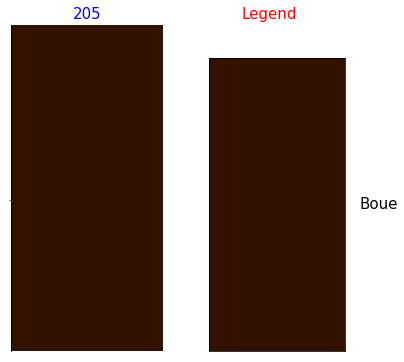

In [28]:
p.boreholes_3d[n].plot_log()

## 3D display of one borehole

In [29]:
p.boreholes_3d[n].plot_3d()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

## 3D display of project boreholes

In [30]:
p.plot_3d(repr_attribute='lithology', labels_size=15, bg_color=["royalblue", "aliceblue"], 
         window_size=(800, 600), verbose=True)

Borehole "201" | attribute values -> ['remblai']
Borehole "205" | attribute values -> ['boue']
Borehole "208" | attribute values -> ['remblai']
Borehole "207" | attribute values -> ['remblai']
Borehole "212" | attribute values -> ['remblai']
Borehole "214" | attribute values -> ['remblai']
Borehole "217" | attribute values -> ['remblai']
Borehole "221" | attribute values -> ['Inconnu']
Borehole "223" | attribute values -> ['remblai']
Borehole "?2" | attribute values -> ['remblai']
Borehole "?1" | attribute values -> ['remblai']
Borehole "224" | attribute values -> ['remblai']
Borehole "225" | attribute values -> ['schiste', 'remblai']
Borehole "226" | attribute values -> ['remblai']
Borehole "50" | attribute values -> ['remblai']
Borehole "51" | attribute values -> ['remblai']
Borehole "52" | attribute values -> ['remblai']
Borehole "302" | attribute values -> ['remblai']
Borehole "303" | attribute values -> ['remblai']
Borehole "304" | attribute values -> ['remblai']
Borehole "305" | 

2021-10-12 23:20:38.648 (   3.606s) [        B79AA740]vtkDataSetAttributes.cx:1296  WARN| vtkPointData (0x527b300): Can not set attribute Scalars. Only vtkDataArray subclasses can be set as active attributes.
